In [4]:
# make sure PySDK and degirum-tools is installed
# !pip show degirum || pip install -q degirum
# !pip show degirum-tools || pip install -q degirum-tools
# !pip install pydantic

In [8]:
# hw_location: where you want to run inference
#     "@cloud" to use DeGirum cloud
#     "@local" to run on local machine
#     IP address for AI server inference
# model_zoo_url: url/path for model zoo
#     cloud_zoo_url: valid for @cloud, @local, and ai server inference options
#     '': ai server serving models from local folder
#     path to json file: single model zoo in case of @local inference
# model_name: name of the model for running AI inference
# image_source: image source for inference
#     path to image file
#     URL of image
#     PIL image object
#     numpy array

hw_location = "@cloud"
model_zoo_url = "https://cs.degirum.com/degirum/timm_gender_model_test"
model_name = "document_text_detection--896x896_float_openvino_cpu_1"
image_source = "text_document.jpg"

In [9]:
import degirum as dg, degirum_tools
from document_ocr_postprocessor import DocTextDetPostprocessor
# Connect to AI inference engine
# degirum_cloud_token: Degirum cloud API access token
document_text_det_zoo = dg.connect(hw_location, model_zoo_url, degirum_tools.get_token())

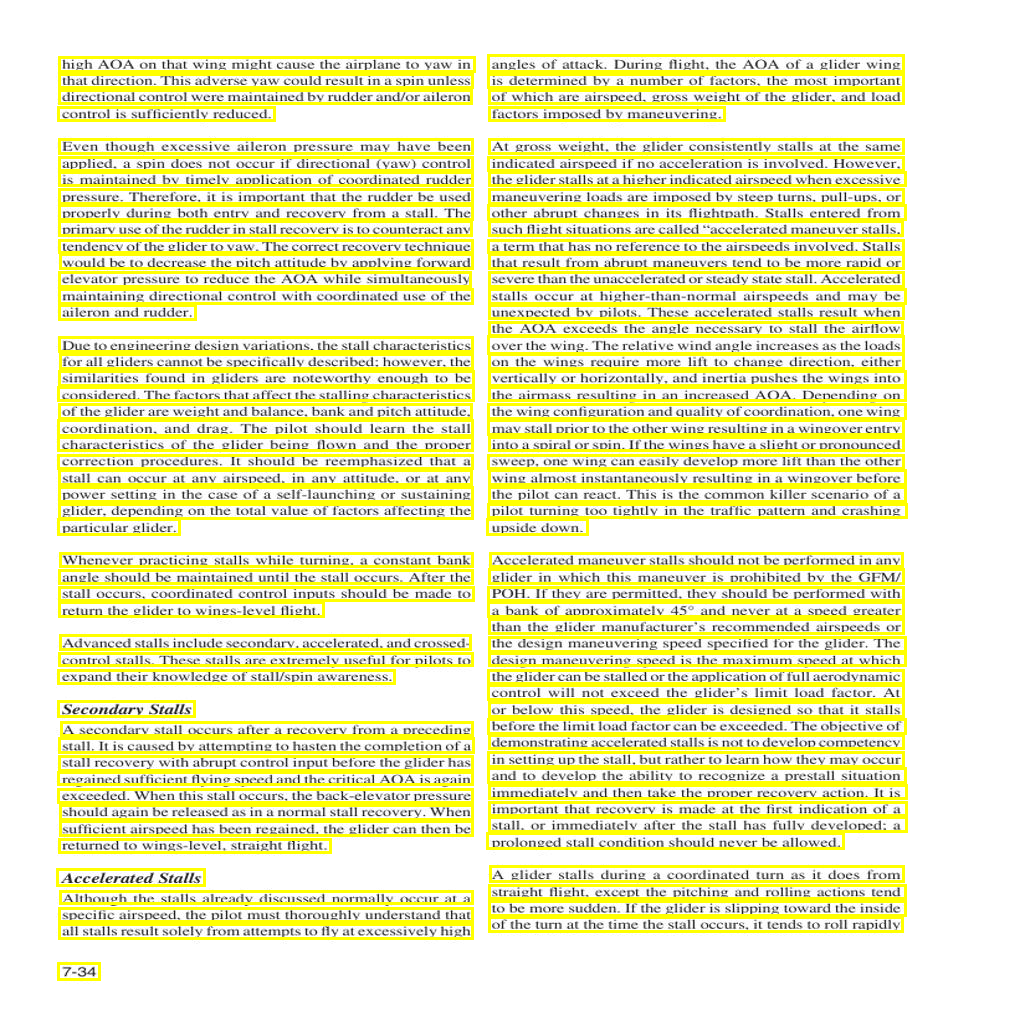

In [10]:
document_text_det_model = document_text_det_zoo.load_model(model_name, input_image_format="RAW", custom_postprocessor = DocTextDetPostprocessor, overlay_show_labels = False)
res = document_text_det_model(image_source)
res.image_overlay